In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

# Cargar el dataset
file_path = '/content/drive/My Drive/Grupo 5 Utec/Machine Learning/DataSet/hepatitis.csv'  # Actualiza la ruta según sea necesario

# Leer el archivo CSV sin nombres de columna
df = pd.read_csv(file_path, delimiter=";")

# Mostrar las primeras filas para verificar que se ha cargado correctamente
df.head()
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    object
 1   Age             155 non-null    int64 
 2   Sex             155 non-null    object
 3   Steroid         155 non-null    object
 4   Antivirals      155 non-null    object
 5   Fatigue         155 non-null    object
 6   Malaise         155 non-null    object
 7   Anorexia        155 non-null    object
 8   LiverBig        155 non-null    object
 9   LiverFirm       155 non-null    object
 10  SpleenPalpable  155 non-null    object
 11  Spiders         155 non-null    object
 12  Ascites         155 non-null    object
 13  Varices         155 non-null    object
 14  Bilirubin       155 non-null    object
 15  AlkPhosphate 

In [ ]:
# Contar la cantidad de valores nulos (?)
nulos = {key: np.sum(value == '?') for key, value in df.items()}

# Mostrar los resultados
print(nulos)

{'Class': 0, 'Age': 0, 'Sex': 0, 'Steroid': 1, 'Antivirals': 0, 'Fatigue': 1, 'Malaise': 1, 'Anorexia': 1, 'LiverBig': 10, 'LiverFirm': 11, 'SpleenPalpable': 5, 'Spiders': 5, 'Ascites': 5, 'Varices': 5, 'Bilirubin': 6, 'AlkPhosphate': 29, 'Sgot': 4, 'Albumin': 16, 'Protime': 67, 'Histology': 0}


In [ ]:
df.describe()

# Mostrar los valores únicos para cada columna
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar resultados
unique_values

{'Class': array(['LIVE', 'DIE'], dtype=object),
 'Age': array([30, 50, 78, 31, 34, 51, 23, 39, 32, 41, 47, 38, 66, 40, 22, 27, 42,
        25, 49, 58, 61, 62, 26, 35, 37, 20, 65, 52, 33, 56, 28, 36, 44, 64,
        45, 57, 24, 67, 59, 60, 48, 54,  7, 69, 72, 70, 46, 53, 43]),
 'Sex': array(['female', 'male'], dtype=object),
 'Steroid': array(['no', 'yes', '?'], dtype=object),
 'Antivirals': array(['yes', 'no'], dtype=object),
 'Fatigue': array(['yes', 'no', '?'], dtype=object),
 'Malaise': array(['yes', 'no', '?'], dtype=object),
 'Anorexia': array(['yes', 'no', '?'], dtype=object),
 'LiverBig': array(['no', 'yes', '?'], dtype=object),
 'LiverFirm': array(['yes', 'no', '?'], dtype=object),
 'SpleenPalpable': array(['yes', 'no', '?'], dtype=object),
 'Spiders': array(['yes', 'no', '?'], dtype=object),
 'Ascites': array(['yes', 'no', '?'], dtype=object),
 'Varices': array(['yes', '?', 'no'], dtype=object),
 'Bilirubin': array(['1.00', '0.90', '0.70', '?', '1.30', '2.20', '2.00', '1.20',


In [ ]:
# Eliminar columnas con demasiados valores nulos
df = df.drop(columns=['Protime', 'AlkPhosphate'])

# Imputar valores numéricos con la mediana
numeric_columns = ['Age', 'Bilirubin', 'Sgot', 'Albumin']  # Actualiza con tus columnas numéricas
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte a numérico (NaN para valores no numéricos)
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# Imputar valores categóricos con el más común (moda)
categorical_columns = ['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig',
                       'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites',
                       'Varices', 'Histology']  # Actualiza con tus columnas categóricas
for col in categorical_columns:
    mode = df[col].mode()[0]  # Encuentra la moda
    df[col] = df[col].replace('?', np.nan)  # Reemplaza '?' por NaN
    df[col].fillna(mode, inplace=True)

# Ahora df está procesado con los valores imputados y columnas eliminadas

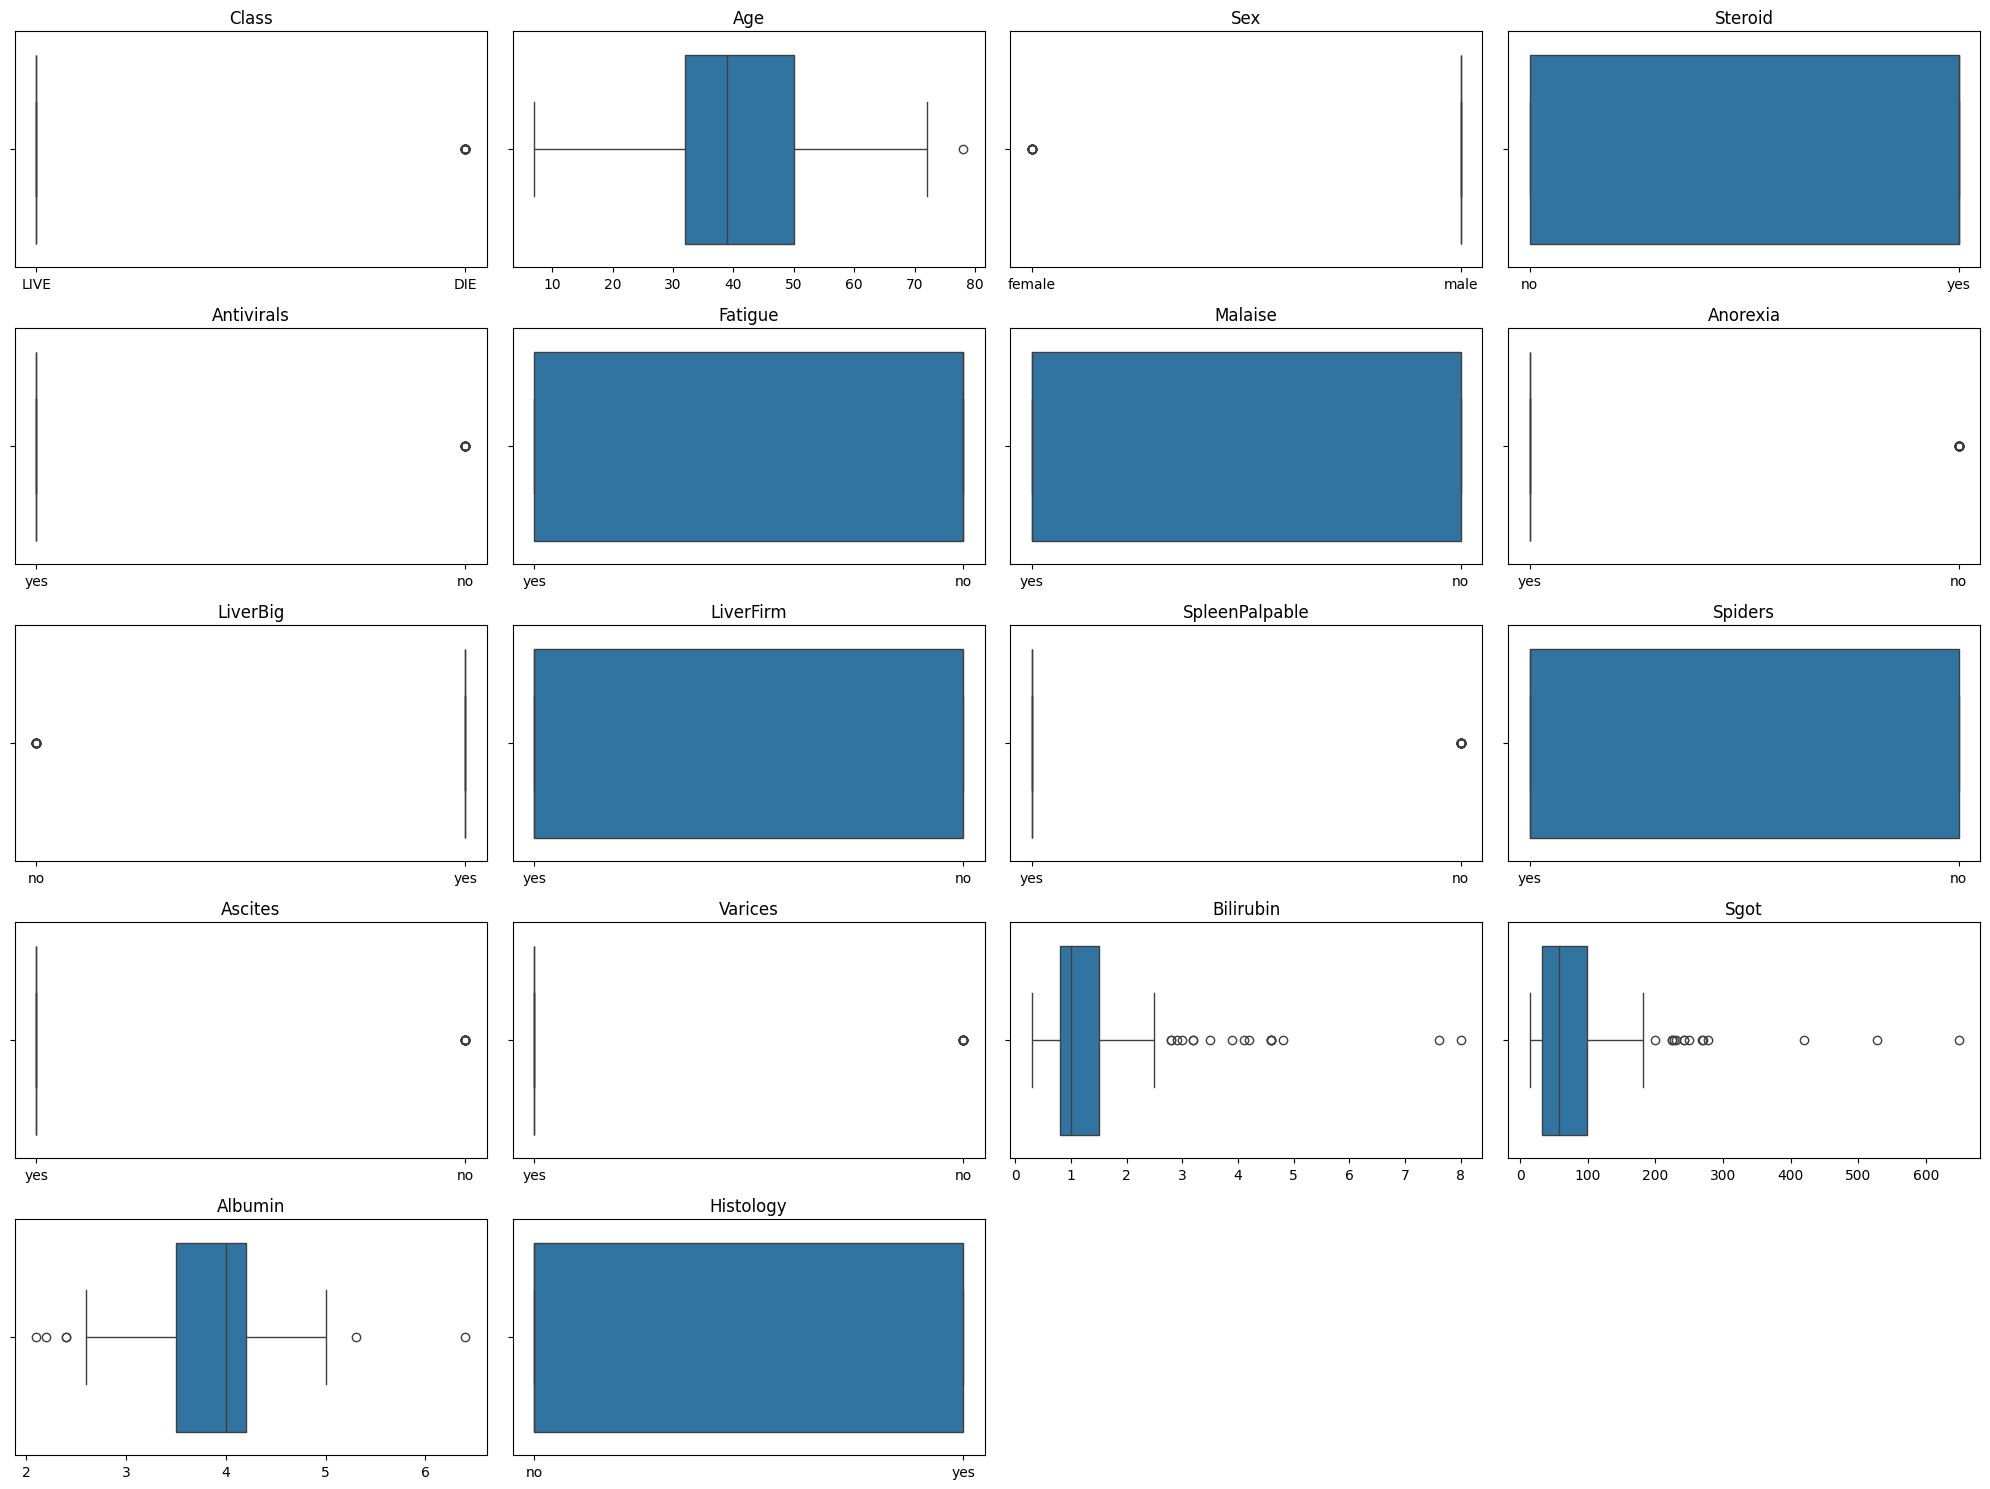

In [ ]:
# Crear gráficos de boxplot para cada columna
plt.figure(figsize=(20, 15))
for i, column in enumerate(df):
    plt.subplot(5, 4, i + 1)  # 5 filas, 4 columnas
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Crear un LabelEncoder
le = LabelEncoder()

# Lista de columnas categóricas
categorical_cols = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
                    'LiverBig', 'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites',
                    'Varices', 'Histology']

# Aplicar LabelEncoder a cada columna categórica
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Convertir la columna 'Class' (target) también si es necesario
df['Class'] = le.fit_transform(df['Class'])

print(df.head())

   Class  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  LiverBig  \
0      1   30    0        0           1        1        1         1         0   
1      1   50    1        0           1        0        1         1         0   
2      1   78    1        1           1        0        1         1         1   
3      1   31    1        1           0        1        1         1         1   
4      1   34    1        1           1        1        1         1         1   

   LiverFirm  SpleenPalpable  Spiders  Ascites  Varices  Bilirubin   Sgot  \
0          1               1        1        1        1        1.0   18.0   
1          1               1        1        1        1        0.9   42.0   
2          1               1        1        1        1        0.7   32.0   
3          1               1        1        1        1        0.7   52.0   
4          1               1        1        1        1        1.0  200.0   

   Albumin  Histology  
0      4.0          0  
1 

In [ ]:
df.describe()

# Mostrar los valores únicos para cada columna
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar resultados
unique_values

{'Class': array([1, 0]),
 'Age': array([30, 50, 78, 31, 34, 51, 23, 39, 32, 41, 47, 38, 66, 40, 22, 27, 42,
        25, 49, 58, 61, 62, 26, 35, 37, 20, 65, 52, 33, 56, 28, 36, 44, 64,
        45, 57, 24, 67, 59, 60, 48, 54,  7, 69, 72, 70, 46, 53, 43]),
 'Sex': array([0, 1]),
 'Steroid': array([0, 1]),
 'Antivirals': array([1, 0]),
 'Fatigue': array([1, 0]),
 'Malaise': array([1, 0]),
 'Anorexia': array([1, 0]),
 'LiverBig': array([0, 1]),
 'LiverFirm': array([1, 0]),
 'SpleenPalpable': array([1, 0]),
 'Spiders': array([1, 0]),
 'Ascites': array([1, 0]),
 'Varices': array([1, 0]),
 'Bilirubin': array([1. , 0.9, 0.7, 1.3, 2.2, 2. , 1.2, 0.6, 0.4, 0.8, 1.4, 2.3, 0.5,
        0.3, 4.6, 1.8, 3.5, 4.1, 1.6, 2.8, 1.5, 2.5, 3. , 4.8, 2.4, 1.7,
        1.1, 3.2, 2.9, 8. , 3.9, 1.9, 4.2, 7.6]),
 'Sgot': array([ 18.,  42.,  32.,  52., 200.,  28.,  58.,  48., 120.,  30., 249.,
         60., 144.,  89.,  53., 166.,  20.,  98.,  63.,  46.,  55.,  25.,
         29.,  92., 150.,  68.,  14.,  16.,  90

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Separar en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inicializar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = rf.predict(X_test)

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

# Evaluar la exactitud (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)
print("\nExactitud del modelo:")
print(accuracy)

# Reporte de clasificación con más métricas
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[ 2  5]
 [ 2 22]]

Exactitud del modelo:
0.7741935483870968

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.81      0.92      0.86        24

    accuracy                           0.77        31
   macro avg       0.66      0.60      0.61        31
weighted avg       0.74      0.77      0.75        31



In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Separar en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predecir y generar la matriz de confusión
y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nExactitud del modelo:")
print(accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[ 2  5]
 [ 7 17]]

Exactitud del modelo:
0.6129032258064516

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.22      0.29      0.25         7
           1       0.77      0.71      0.74        24

    accuracy                           0.61        31
   macro avg       0.50      0.50      0.49        31
weighted avg       0.65      0.61      0.63        31

